In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [160]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [161]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

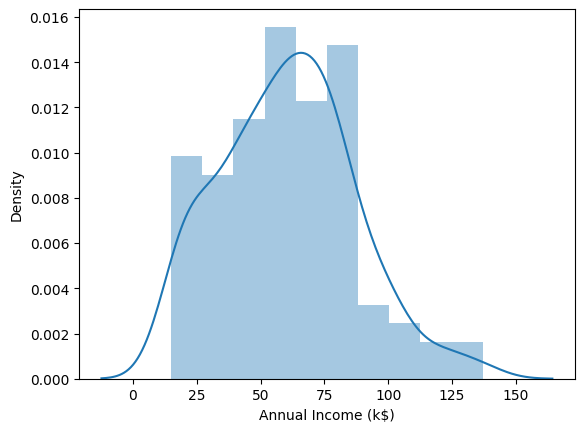

In [162]:
sns.distplot(df['Annual Income (k$)'])

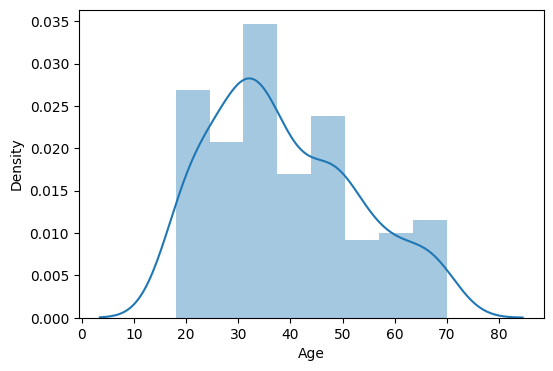

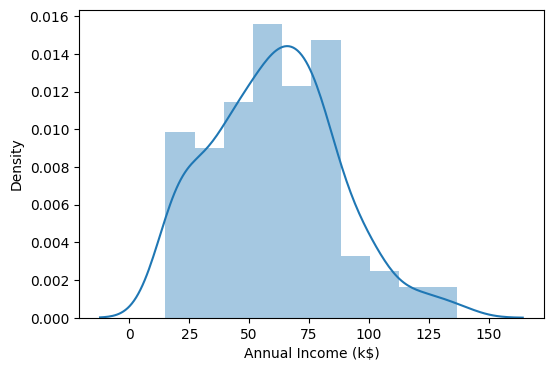

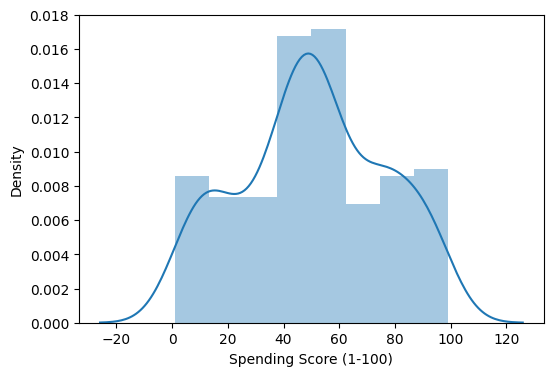

In [163]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(6,4))
    sns.distplot(df[i])

In [164]:
df['Gender'] = df['Gender'].astype(str)

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

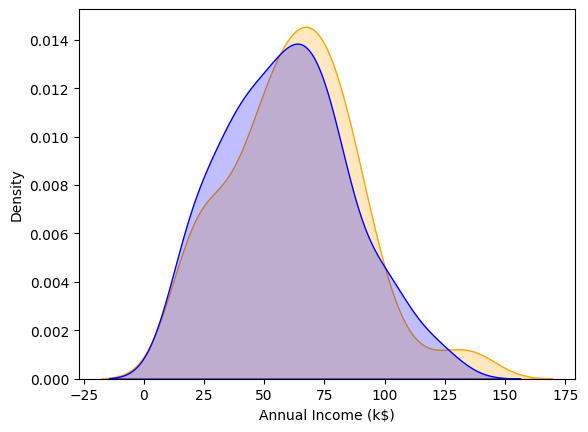

In [165]:
male = df[df['Gender']=='Male']
female = df[df['Gender']=='Female']
sns.kdeplot(male['Annual Income (k$)'],shade = True,color='orange')
sns.kdeplot(female['Annual Income (k$)'],shade = True,color='blue')

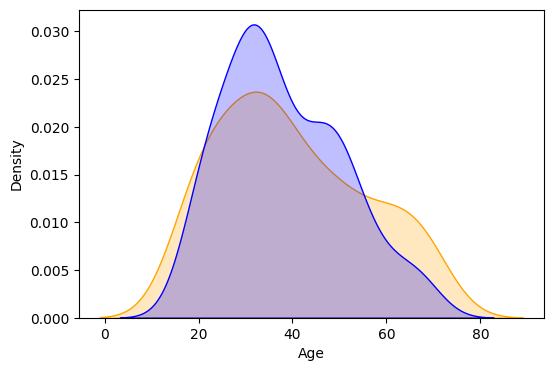

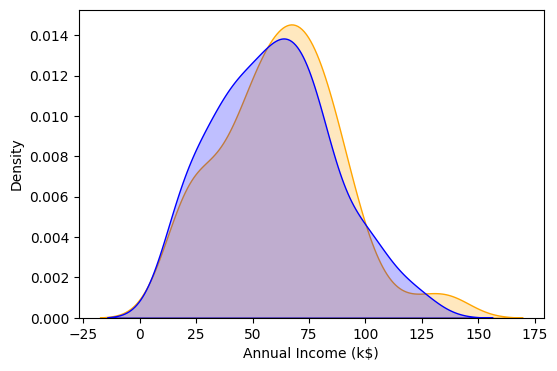

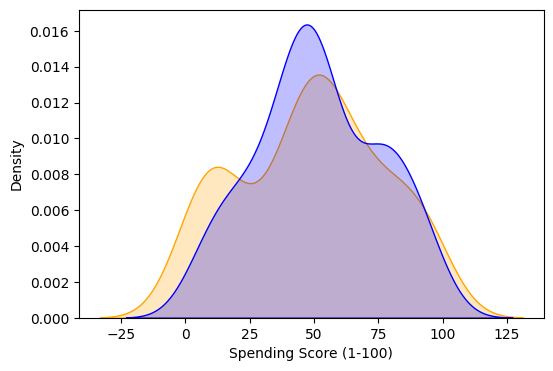

In [166]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(male[i],shade = True,color='orange')
    sns.kdeplot(female[i],shade = True,color='blue')

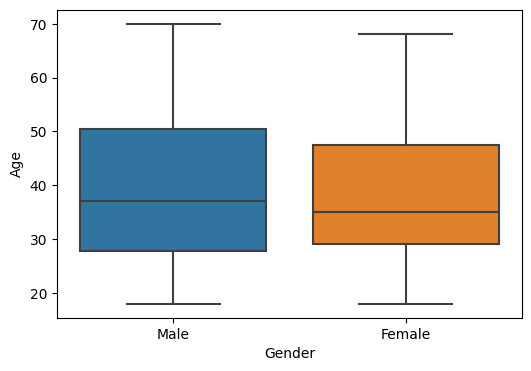

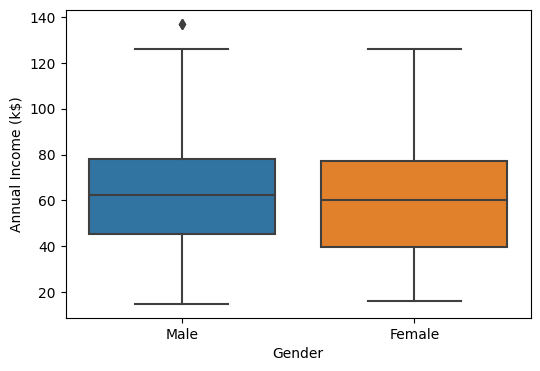

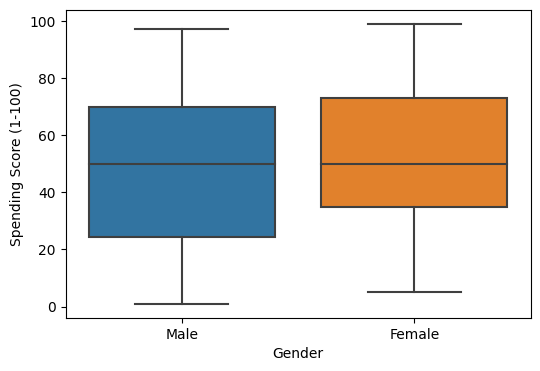

In [167]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df,x='Gender',y=i)

In [168]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

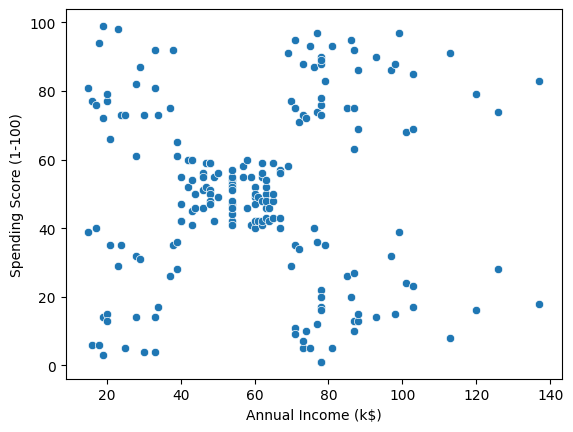

In [169]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

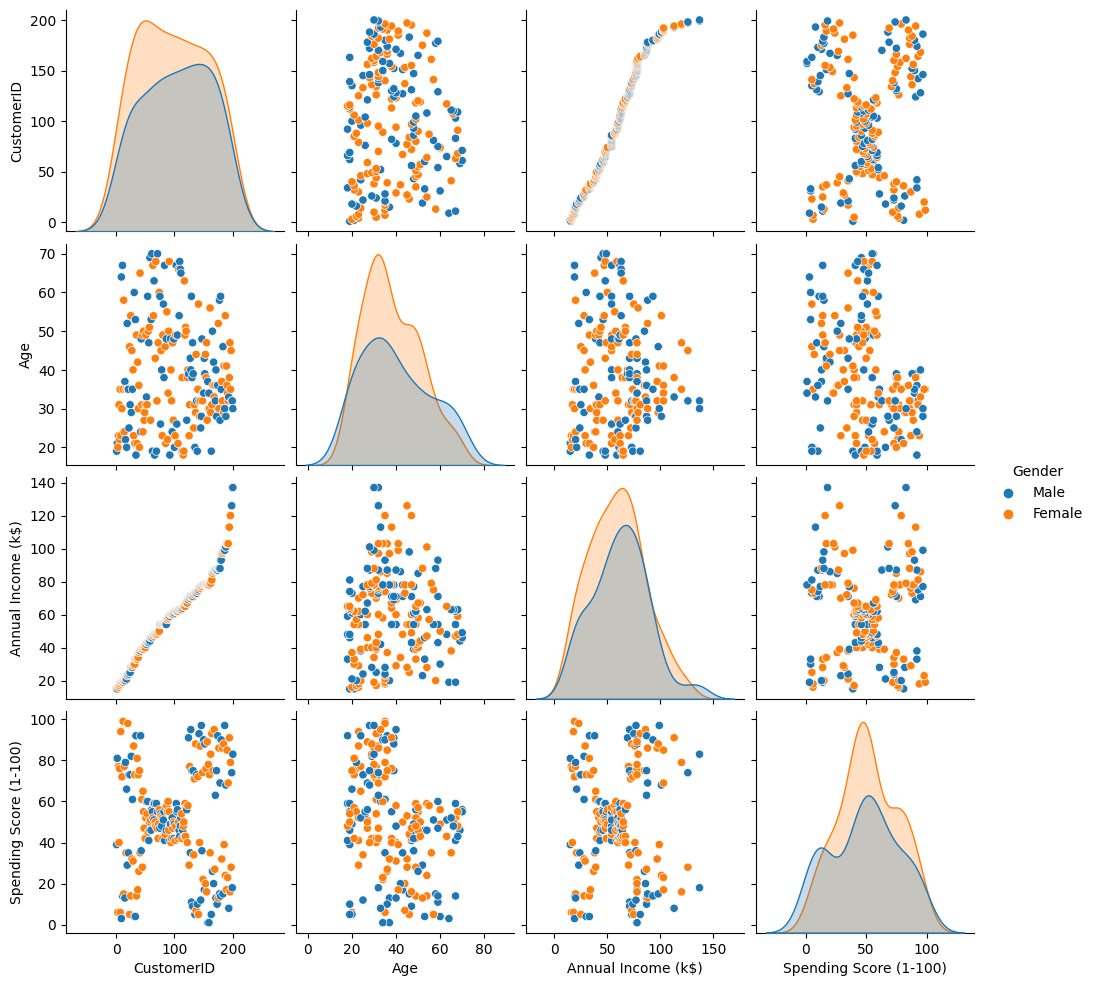

In [170]:
#df = df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [171]:
df[['Annual Income (k$)','Spending Score (1-100)','Age']].groupby(df['Gender']).mean()

,Annual Income (k$),Spending Score (1-100),Age
Gender,,,
Female,59.250000,51.526786,38.098214
Male,62.227273,48.511364,39.806818


In [172]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

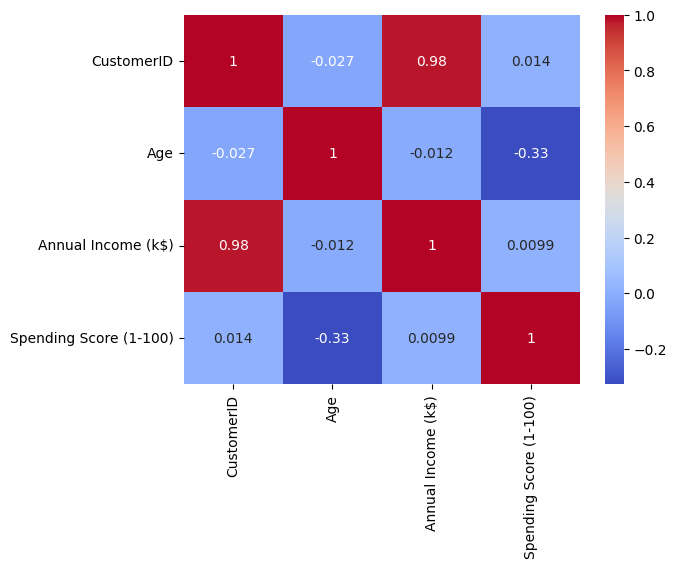

In [173]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustrenig - Uni,Bi,Multi Variate

In [174]:
clustreing = KMeans(n_clusters=6) 

In [175]:
clustreing.fit(X=df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [176]:
clustreing.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       3, 3])

In [177]:
df['Income cluster'] = clustreing.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [178]:
df['Income cluster'].value_counts()

5    48
2    42
1    42
0    32
4    28
3     8
Name: Income cluster, dtype: int64

In [179]:
clustreing.inertia_

5050.9047619047615

In [180]:
inertia_score = []
for x in range(1,11):
    km = KMeans(n_clusters=x)
    km.fit(df[['Annual Income (k$)']])
    inertia_score.append(km.inertia_)

In [181]:
inertia_score

[137277.28,
 48660.88888888889,
 23517.33093093093,
 13278.112713472487,
 8481.49619047619,
 5050.9047619047615,
 3941.4163614163617,
 2862.250427350427,
 2173.287445887446,
 1838.4626559714798]

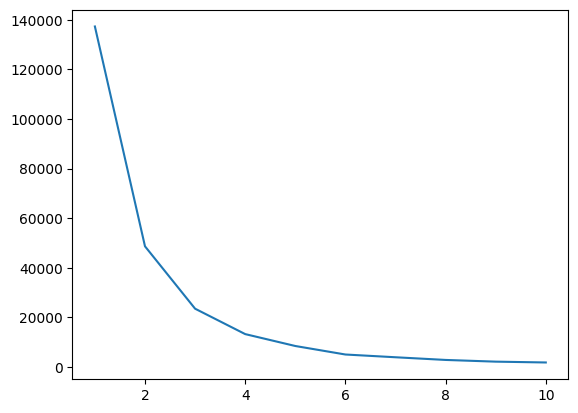

In [182]:
plt.plot(range(1,11),inertia_score) # Elbow method

In [183]:
df[['Annual Income (k$)','Spending Score (1-100)','Age']].groupby(df['Income cluster']).mean()

,Annual Income (k$),Spending Score (1-100),Age
Income cluster,,,
0,22.000000,49.656250,34.906250
1,75.095238,51.095238,35.428571
2,42.238095,50.666667,43.000000
3,124.000000,49.625000,36.500000
4,93.000000,50.928571,38.214286
5,60.083333,49.041667,41.604167


# Bivariate Clustering

In [184]:
clustreing2 = KMeans(n_clusters=5)
clustreing2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [185]:
df['Spending and income cluster'] = clustreing2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and income cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,0


In [186]:
inertia_score2 = []
for x in range(1,11):
    km = KMeans(n_clusters=x)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_score2.append(km.inertia_)

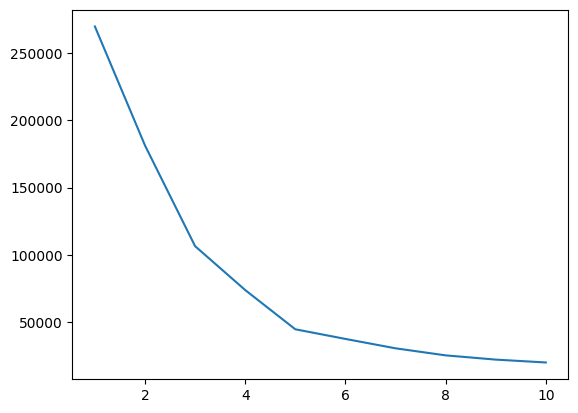

In [187]:
plt.plot(range(1,11),inertia_score2) # Elbow method, so the elbow seems to be happend at number 5

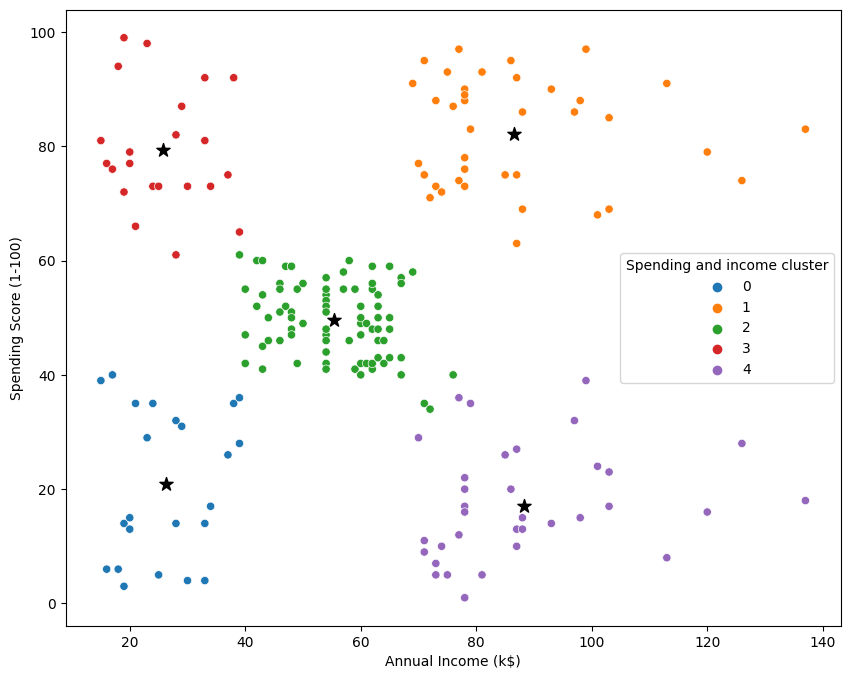

In [188]:
centers = pd.DataFrame(clustreing2.cluster_centers_)
centers.columns = ['X','Y']


plt.figure(figsize=(10,8))
plt.scatter(centers['X'],centers['Y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and income cluster',palette='tab10')
plt.savefig("clustreing_bivariate.png")

In [189]:
pd.crosstab(df['Spending and income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and income cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.590909,0.409091
4,0.457143,0.542857


In [190]:
df[['Annual Income (k$)','Spending Score (1-100)','Age']].groupby(df['Spending and income cluster']).mean()

,Annual Income (k$),Spending Score (1-100),Age
Spending and income cluster,,,
0,26.304348,20.913043,45.217391
1,86.538462,82.128205,32.692308
2,55.296296,49.518519,42.716049
3,25.727273,79.363636,25.272727
4,88.200000,17.114286,41.114286


# Multivariant Clustreing

In [191]:
from sklearn.preprocessing import StandardScaler as ss

In [192]:
scale = ss()

In [193]:
newdf = pd.get_dummies(df,drop_first=True)
newdf.rename(columns={"Gender_Male":"Gender"},inplace=True) # 1 : Male , 0 : Female
newdf = newdf[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']]
newdf.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [194]:
newdf = pd.DataFrame(scale.fit_transform(newdf))
newdf.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [195]:
inertia_score3 = []
for x in range(1,11):
    km = KMeans(n_clusters=x)
    km.fit(newdf)
    inertia_score3.append(km.inertia_)

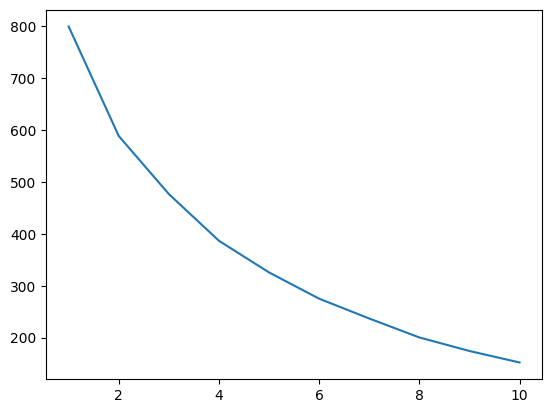

In [196]:
plt.plot(range(1,11),inertia_score3)